E necessario creare delle strutture di dati per contenere i valori che comporranno le espressioni matematiche che costituiscono i NN .

Iniziamo da un semplice oggetto Value che rappresente un semplice valore scalare

In [12]:
class Value:
    
    # Costruttore
    def __init__(self, data):
        self.data = data
        
    # Metodo utilizzato da Python per la visualizzazione dell'oggetto. Consente di impostare un visualizzazione user friendly
    def __repr__(self):
        return f"Value(data={self.data})"
    
    # Definisce l'operatore per la somma (+). Quando trova l'operatore +, Python chiama questo metodo
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    # Definisce l'operatore per la prodottp (*). Quando trova l'operatore *, Python chiama questo metodo
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out
    


Value(data=2.0)

In [35]:
a = Value(2.0)
a

Value(data=2.0)

In [36]:
b = Value(-3.0)
a + b

Value(data=-1.0)

In [37]:
a * b

Value(data=-6.0)

Dopo aver definito gli operatori somma e moltiplicazione è possibile eseguire l'espressione del notebook precedente<br>
d = a*b + c

In [38]:
c = Value(10)
d = a*b + c
d

Value(data=4.0)

A questo punto è necessario mantenere traccia dei valori che hanno contribuito al risultato finale e per far ciò è necessario modificare l'oggetto Value. <br>
A tal fine introduciamo nel costruttore la variabile _childeren che di default è una tuple vuota.<br>
Nei metodi __sum__ e __mul__ andiamo a valorizzare la variabile _children con gli elementi costituenti l'operazione

E' infine necessario aggiungere all'interno dell'oggetto Value l'informazione di quale operazione ha creato l'oggetto.
Anche questa variabile verrà inizializzata nel costruttore e valorizzata nei metodi __sum__ e __mul__

In [39]:
class Value:
    
    # Costruttore
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children) # viene tenuto il set per ragioni di efficienza
        self._op = _op
        
    # Metodo utilizzato da Python per la visualizzazione dell'oggetto. Consente di impostare un visualizzazione user friendly
    def __repr__(self):
        return f"Value(data={self.data})"
    
    # Definisce l'operatore per la somma (+). Quando trova l'operatore +, Python chiama questo metodo
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    # Definisce l'operatore per la prodottp (*). Quando trova l'operatore *, Python chiama questo metodo
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [40]:
d = a*b + c
d

Value(data=4.0)

E' ora possibile sapere quali sono i valori che hanno contribuito al valore finale dell'espressione

In [41]:
d._prev

{Value(data=-6.0), Value(data=10)}

In [42]:
d._op

'+'

In [ ]:
Utilizzando il package Graphviz, creiamo una funzione che ci consenta di visualizzare graficamente l'espressione matematica 

In [58]:
from graphviz import Digraph

# Helper function che serve per ottenere tutti gli edge e i node presenti nel graph partendo dal nodo di root
def trace(root):
    
    # inizializza i set vuoti
    nodes, edges = set(), set()
    
    # Funzione ricorsiva che, dato un nodo, ne estre i children e li aggiunge ai set di Edge e Node
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
                
    # Chiamata iniziale alla funzione ricorsiva
    build(root)
    return nodes, edges

# Funzione che richiama l'API di Graphviz per disegnare il grafo con i nodi e gli edge che compongono la funzione
#
def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    
    # Chiamo Helper Function per estrarre gli edge e i node
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
#        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
#        dot.node(name=str(id(n)), label = "{ data %.4f }" % (n.data), shape='record')
        dot.node(name=str(id(n)), label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

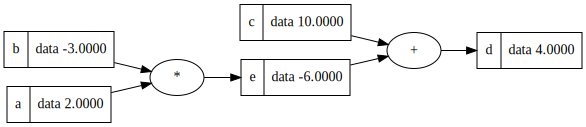

In [59]:
draw_dot(d)

Per migliorare la visualizzazione andiamo ad implementare la classe Value aggiungendo la _label da visualizzare

In [60]:
class Value:
    
    # Costruttore
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children) # viene tenuto il set per ragioni di efficienza
        self._op = _op
        self.label = label
        
    # Metodo utilizzato da Python per la visualizzazione dell'oggetto. Consente di impostare un visualizzazione user friendly
    def __repr__(self):
        return f"Value(data={self.data})"
    
    # Definisce l'operatore per la somma (+). Quando trova l'operatore +, Python chiama questo metodo
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    # Definisce l'operatore per la prodottp (*). Quando trova l'operatore *, Python chiama questo metodo
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

E' necessario reinizializzare i diversi Values object che costituiscono la nostra espressione per aggiungere le labels.<br>
Aggiungiamo anche altro valore "f" e l'output finale "L"

In [63]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10, label='c')
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
L

Value(data=-8.0)

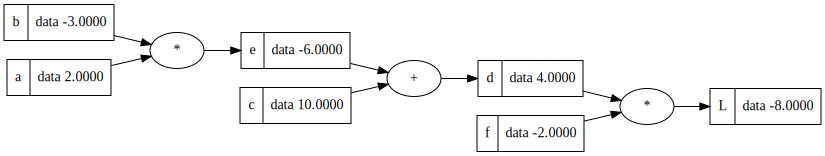

In [64]:
draw_dot(L)

Fino a questo punto abbiamo costruito una espressione matematica che, partendo da una serie di input rappresentati da valori scalari, ottiene un risultato finale "L".<br>
Tutto ciò corrisponde al "forward pass"
Prossimo step è eseguire la backprop